# This notebook is meant to create functions for plotting 

Goal is then to add them to the classes or as checks that everything is well

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml

import matplotlib.pyplot as plt


print(os.getcwd())

from tempest import casestudy
from tempest import grid

settings_path = 'settings/intro.yaml'

with open(settings_path, 'r') as file:
    settings = yaml.safe_load(file)

/home/mcarenso/code/tempest


In [4]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
cs = casestudy.CaseStudy(settings)
gr = grid.Grid(settings, verbose = True, overwrite = False)

if __name__ == '__main__':
    print("Loaded Configuration:")
    for key, value in settings.items():
        print(f"{key}: {value}")

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Precac
day:      (#t)  t_i-t_f
16-08-31: (48) 1440-1487
16-09-01: (1) 1488-1488
U10m
day:      (#t)  t_i-t_f
16-08-31: (48) 1440-1487
16-09-01: (1) 1488-1488
V10m
day:      (#t)  t_i-t_f
16-08-31: (48) 1440-1487
16-09-01: (1) 1488-1488


False
Found grid attributes file , so loading /home/mcarenso/code/tempest/output/DYAMOND_SAM_ITCZ_intro/grid_attributes.pkl instead of computing
Loaded Configuration:
MODEL: DYAMOND_SAM
REGION: ITCZ_intro
DIR_INPUT: /input
DIR_FIG: /figures
DIR_OUT: /output
DIR_TEMPDATA: /cache
DIR_DATA_OUT: /homedata/mcarenso/tempest
DIR_DATA_IN: /home/mcarenso/code/tempest/input/intro/data
DIR_DATA2: /homedata/mcarenso/DYAMOND_REGIONS/tropics/SAM/diagnostics_2D
DIR_TOOCANSEG_DYAMOND: None
DIR_STORM_TRACKING: /data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking
REL_TABLE: input/re

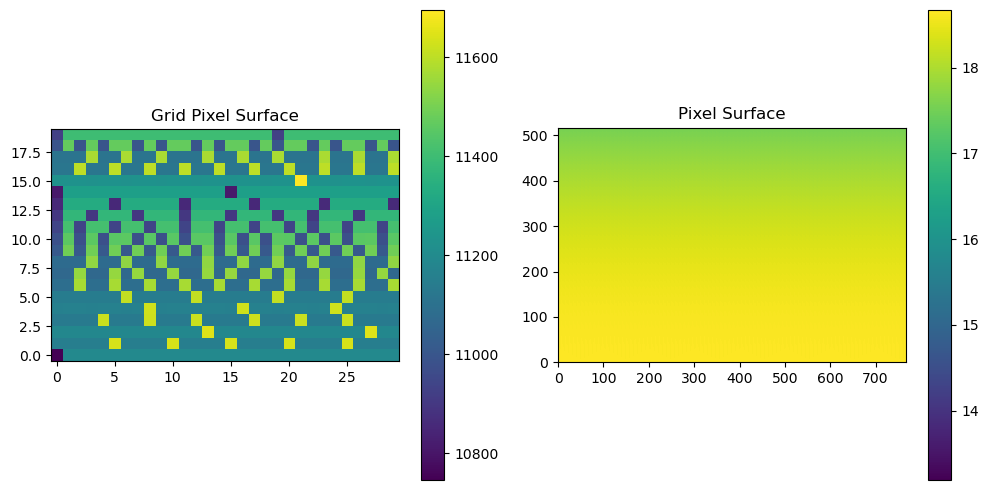

In [5]:
gr.plot_grid()

In [6]:
X = gr.template_native_df